In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('master.csv')

## let's get some basic information about this suicide dataset #

In [3]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### As we can see below, there are 27820 instances, and each instance has 12 features(columns), they are listed as follow:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### let's check the head 10 insatnces first

In [5]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


### What about the 10 instances at the end of the dataset?
Everything seems Ok, and this dataset is clean enough without any outliers

In [6]:
data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [7]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum()) #this dataframe only contains [country] and the sum of its work
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no',ascending=False)

G:\anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [8]:
print('the total number of countries in the dataset is :',suic_sum.shape[0]) #so there are totally 101 countires in this dataset

the total number of countries in the dataset is : 101


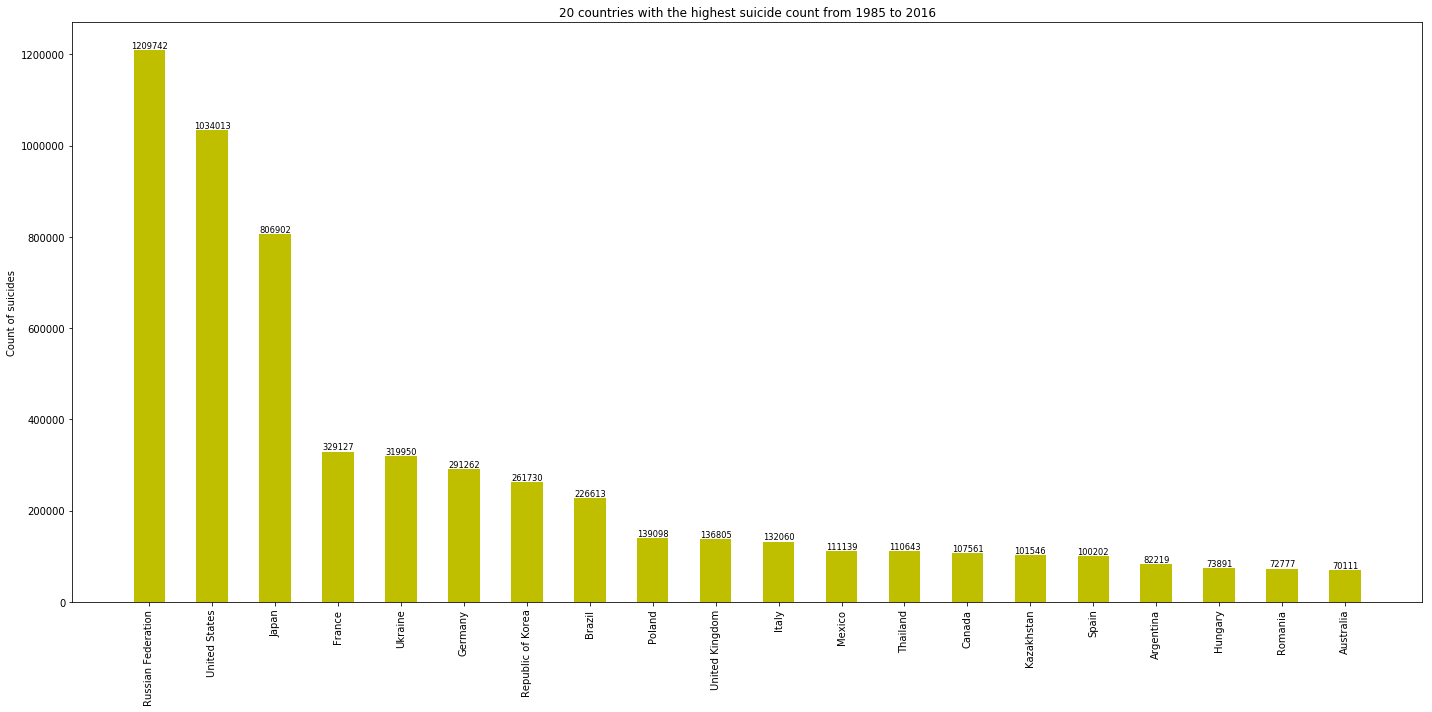

In [9]:
topN = 20 #change this number to see more countries, max =101
most_cont = suic_sum.head(topN)

xticks = np.array(most_cont.iloc[:,0])

heights = np.array(most_cont.iloc[:,1])

fig = plt.figure(figsize=(20,10))
plt.title('20 countries with the highest suicide count from 1985 to 2016')
plt.xticks(range(len(xticks)),xticks,rotation=90)
barChart = plt.bar(range(len(heights)),heights,width=0.5,align ='center',color='y')

plt.ylabel('Count of suicides')
plt.tight_layout()

#data text annotate
for rect in barChart:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',size='small')



### so what about the top  20 countries with highest suicide rate through 1985 to 2016?

G:\anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


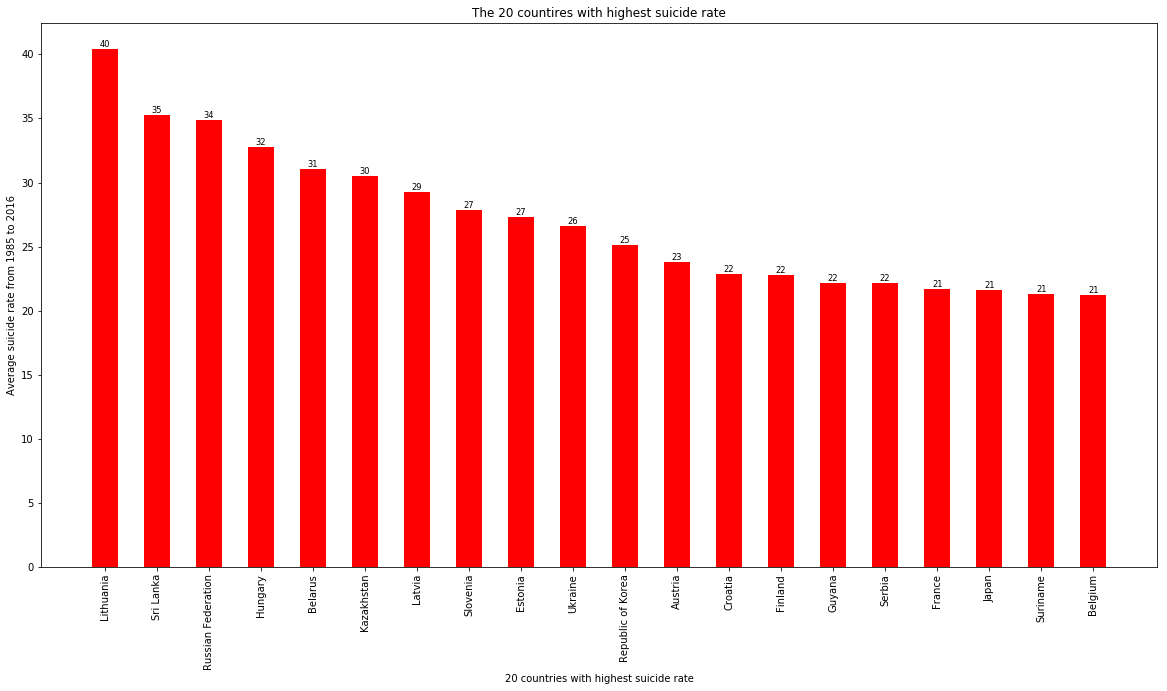

In [10]:
topN = 20;
suicide_rate = pd.DataFrame(data[['suicides/100k pop','gdp_per_capita ($)']].groupby(data['country']).mean())
suicide_rate = suicide_rate.reset_index().sort_index(by='suicides/100k pop',ascending=False)
highest_rate_countries = suicide_rate.iloc[0:topN,0]
highest_rate = suicide_rate.iloc[0:topN,1]

fig = plt.figure(figsize = (20,10))
plt.title('The 20 countires with highest suicide rate')
plt.xticks(range(topN),highest_rate_countries, rotation = 90)
bar_rate = plt.bar(range(topN),highest_rate,width=0.5,align = 'center', color = 'red')
plt.xlabel('20 countries with highest suicide rate')
plt.ylabel('Average suicide rate from 1985 to 2016')

for rect in bar_rate:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',size='small')


## get start with the percentage of suicides in different countries from 1985 to 2016 ##

### see the percentage of suicides in the pie chart below ###

The total number of suicides all over the world from 1985 to 2016 is: 6748420


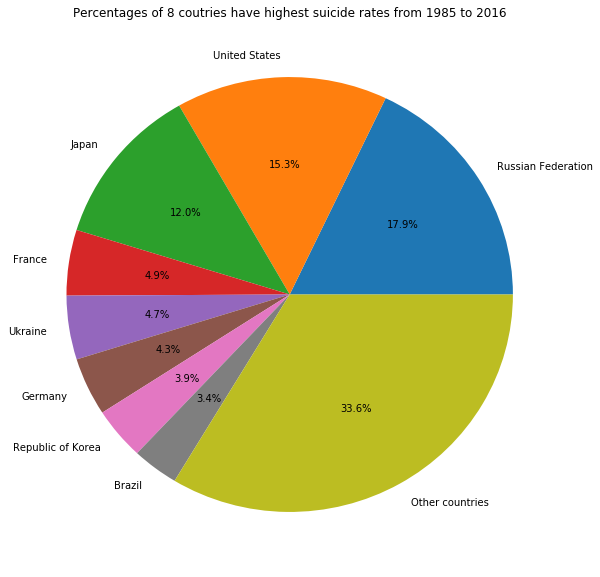

In [11]:
sectorNumber = 8 # change this number to see more countries, max 101
total_suicide_number = suic_sum.sum(1).sum()
print('The total number of suicides all over the world from 1985 to 2016 is:' ,total_suicide_number)
suic_percentage = suic_sum.iloc[:,1] / total_suicide_number 
most_cont_percentage = suic_percentage.iloc[0:sectorNumber]


sectorName = np.array(suic_sum.iloc[0:sectorNumber])[:,0]
sectorName = np.append(sectorName,'Other countries')
otherCountyPercentage = 1.0 - most_cont_percentage.sum()
most_cont_percentage = np.append(most_cont_percentage,otherCountyPercentage)
fig = plt.figure(figsize=(10,10))
plt.title('Percentages of 8 coutries have highest suicide rates from 1985 to 2016')
plt.pie(most_cont_percentage,labels=sectorName,autopct='%1.1f%%');




### Let's look at the average GDP per capita of each country from 1985 to 2016
let's look at the 20 coutries with highest GDP

In [12]:
topN = 20
GDP_data = data.groupby('country').mean()
GDP_data = GDP_data.reset_index().sort_values(by='gdp_per_capita ($)',ascending = False)
GDP_data.columns

Index(['country', 'year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')

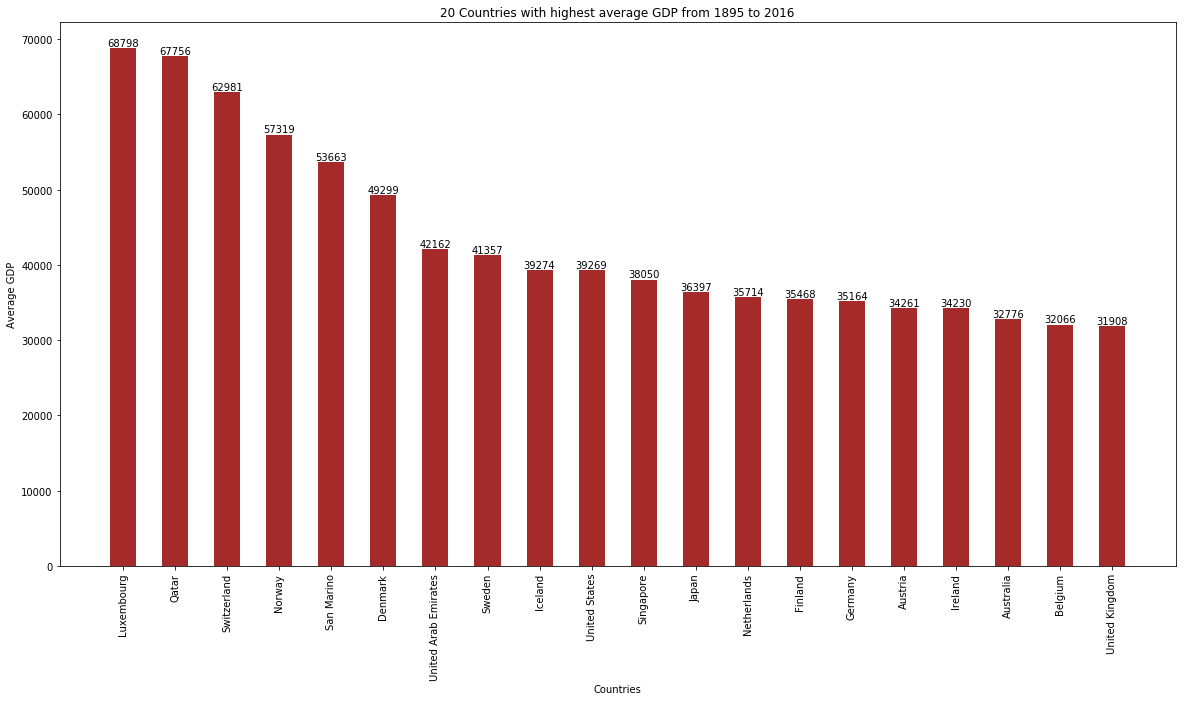

In [13]:
GDP_top = GDP_data[0:topN]
countries = np.array(GDP_top.loc[:,'country'])
mean_GDP = np.array(GDP_top.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10));
plt.title('20 Countries with highest average GDP from 1895 to 2016')
plt.xticks(range(len(countries)),countries,rotation=90);
plt.xlabel('Countries')
plt.ylabel('Average GDP')
barGDP = plt.bar(countries,mean_GDP,color='brown',width=0.5)
#get text

for rect in barGDP:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


### So what is the relationship between GDP_per_capita and suicide rate?
 check the top 20 countries with highest rate and the GDP condition of each of them

<BarContainer object of 20 artists>

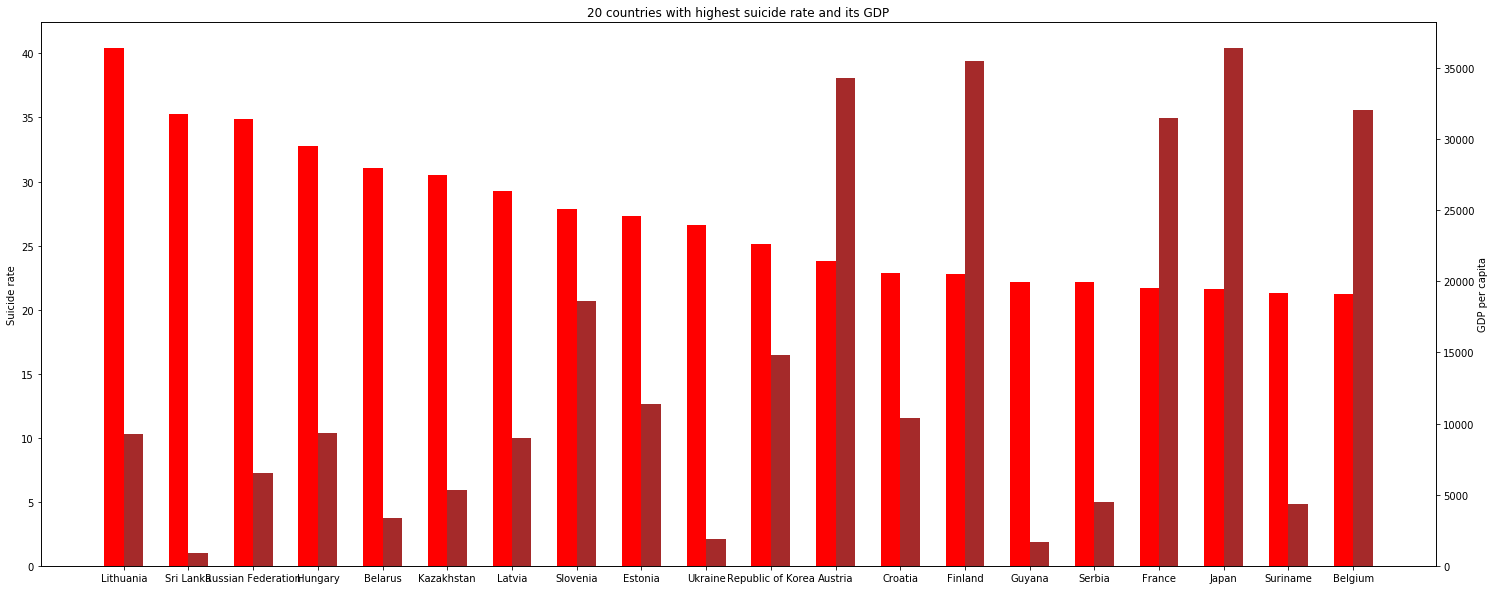

In [14]:
highest_rate_gdp = suicide_rate.iloc[0:topN,2]

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.xticks(range(topN),highest_rate_countries,rotation=180)
plt.title('20 countries with highest suicide rate and its GDP')
plt.xlabel('Countries')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')

width = 0.3
position1 = np.arange(topN) - width/2.0
position2 = position1 + width
ax1.bar(position1,highest_rate,width=width,color='r')
ax2.bar(position2,highest_rate_gdp,width=width,color='brown')

### There is no abvious relationship between gdp and suicide rate
Let's check the peason correlation betweeen the average suicide rate of each countries and the GDP_per_capita

In [15]:
suicide_rate.corr('pearson')

,suicides/100k pop,gdp_per_capita ($)
suicides/100k pop,1.000000,0.038206
gdp_per_capita ($),0.038206,1.000000


### we can find out that the pearson corelation is 0.038296 which is close to 0, so there is no linear relationship between them.
so what about other columns? let's check

In [16]:
data.corr('pearson')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


## From the table above, we find that the:
1. The pearson value of "suicide_no" and "population" is 0.616162, which is consistent to our intuitive that "more population, more suicides count"
2. The pearson value of "HDI for year" and "gdp_per_capita" 


In [17]:
#show which countries do we have
all_condition = pd.DataFrame(data[['suicides/100k pop','gdp_per_capita ($)']].groupby(data['country']).mean())
# sort by suicide rate
all_condition = all_condition.reset_index().sort_index(by='suicides/100k pop',ascending=False)
all_condition = all_condition.reset_index(drop = True)

#select top 5 
top5Country = all_condition['country'][0:5]
bottom5Country = all_condition['country'][95:100]

G:\anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


### Let's check the trend of suicide rate and the trend of GDP in Lithuanaia

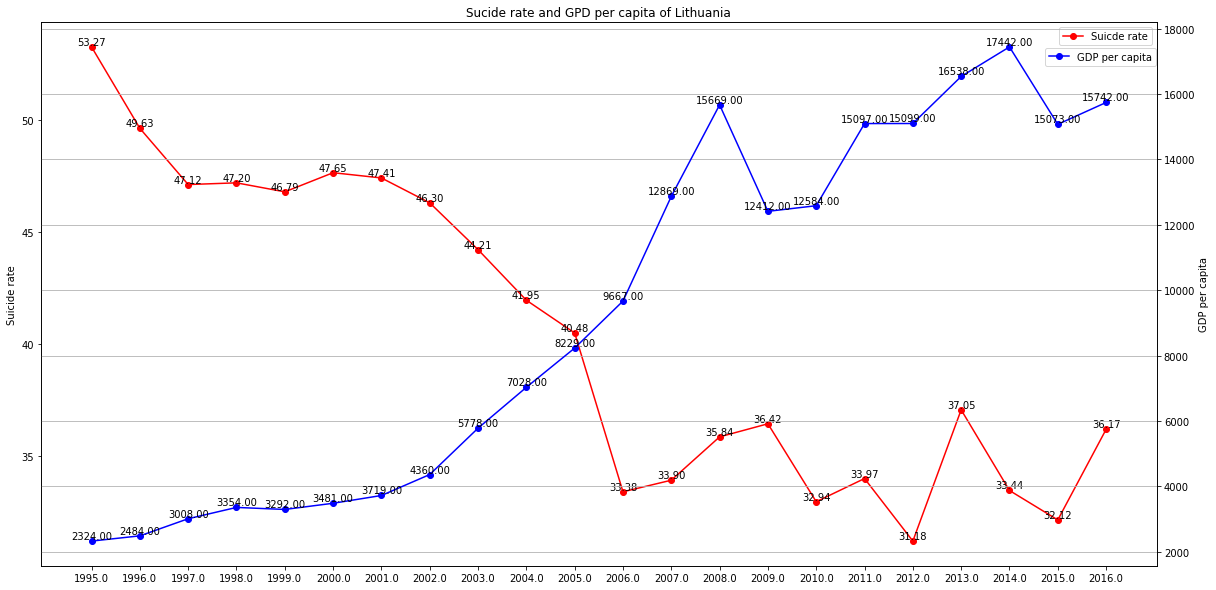

In [18]:
Lithuania_data = data.iloc[np.where(data['country'] == top5Country[0])[0]]
Lithuania_by_time =  Lithuania_data.groupby('country-year').mean()

Lithuania_time = Lithuania_by_time.iloc[:,0]
Lithuania_suicide_rate = Lithuania_by_time.loc[:,'suicides/100k pop']
Lithuania_gdp = Lithuania_by_time.loc[:,'gdp_per_capita ($)']

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Lithuania')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(Lithuania_time)),Lithuania_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(Lithuania_time)),Lithuania_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(Lithuania_time)), Lithuania_time, rotation=90)

ax1.legend()
ax2.legend(loc = (0.9,0.92))
for i in range(len(Lithuania_time)):
    ax1.text(i,Lithuania_suicide_rate[i],'%.2f' % Lithuania_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(Lithuania_time)):
    ax2.text(i,Lithuania_gdp[i],'%.2f' % Lithuania_gdp[i], ha='center', va= 'bottom')

plt.grid()

### What about Japan?

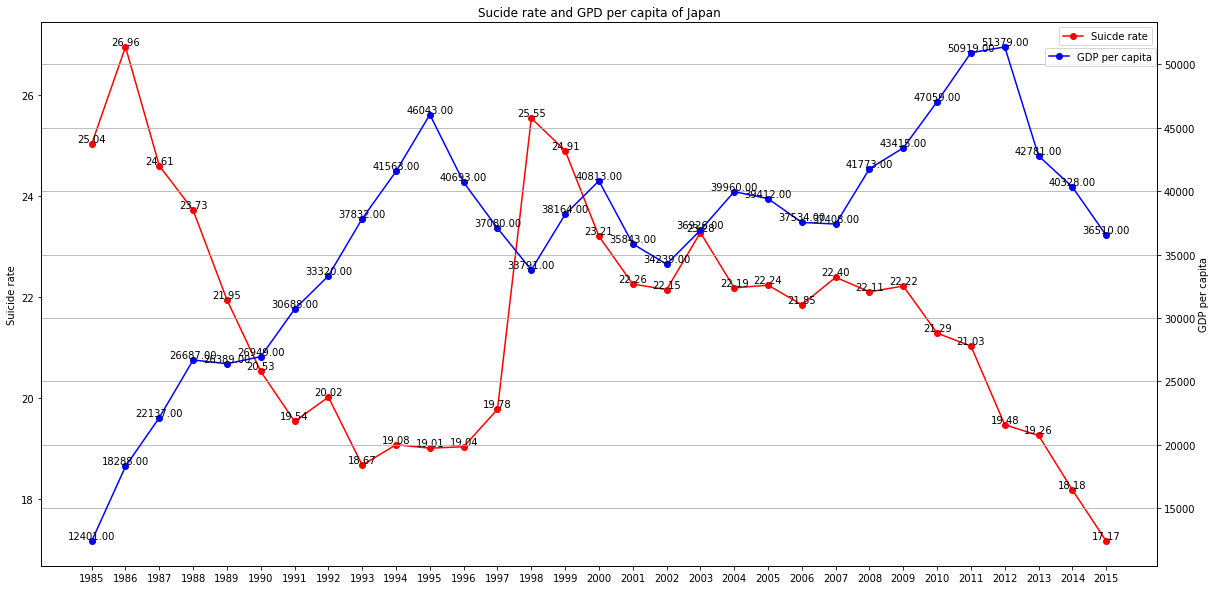

In [19]:
Japan_data = data.iloc[np.where(data['country'] == 'Japan')[0]]

Japan_times = Japan_data['year'].unique()
Japan_data = Japan_data.groupby('year').mean()
Japan_suicide_rate = np.array(Japan_data.loc[:,'suicides/100k pop'])
Japan_gdp = np.array(Japan_data.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Japan')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(Japan_times)),Japan_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(Japan_times)),Japan_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(Japan_times)), Japan_times, rotation=90)

ax1.legend()
ax2.legend(loc = (0.9,0.92))
for i in range(len(Japan_times)):
    ax1.text(i,Japan_suicide_rate[i],'%.2f' % Japan_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(Japan_times)):
    ax2.text(i,Japan_gdp[i],'%.2f' % Japan_gdp[i], ha='center', va= 'bottom')

plt.grid()

### So what about the countries with lowest suicide rate?
The 5 countries with lowest suicide rate show as follow, let's check South Africa

In [20]:
bottom5Country

95             South Africa
96                     Oman
97      Antigua and Barbuda
98                  Jamaica
99    Saint Kitts and Nevis
Name: country, dtype: object

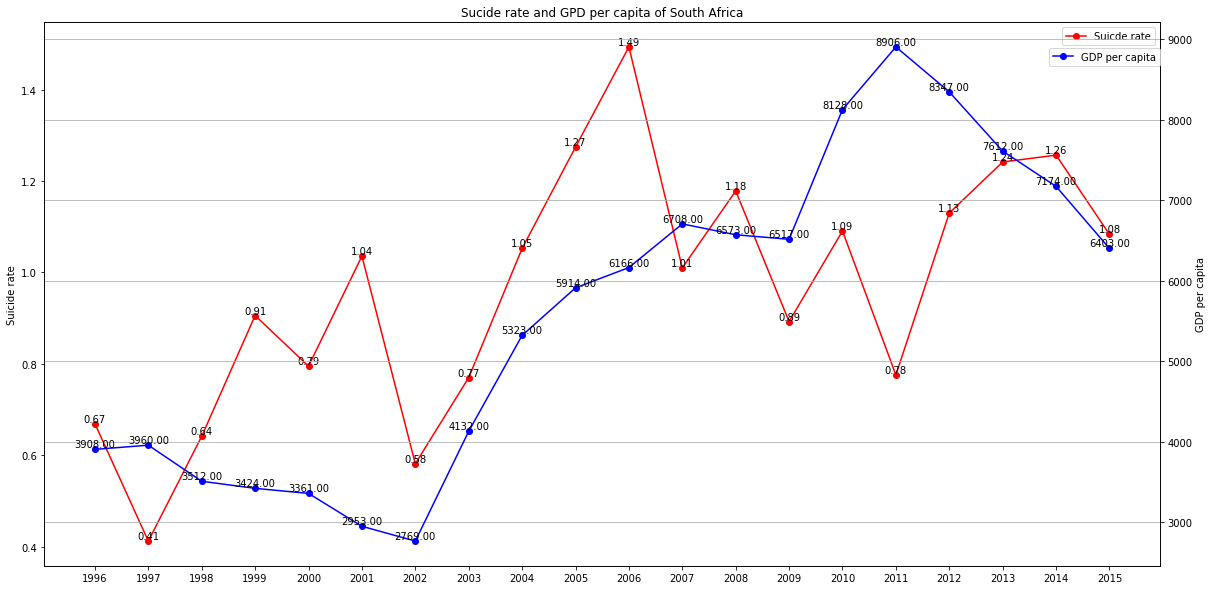

In [21]:
SA_data = data.iloc[np.where(data['country'] == 'South Africa')[0]]

SA_times = SA_data['year'].unique()
SA_data = SA_data.groupby('year').mean()
SA_suicide_rate = np.array(SA_data.loc[:,'suicides/100k pop'])
SA_gdp = np.array(SA_data.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of South Africa')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(SA_times)),SA_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(SA_times)),SA_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(SA_times)), SA_times, rotation=90)

ax1.legend()
ax2.legend(loc = (0.9,0.92))
for i in range(len(SA_times)):
    ax1.text(i,SA_suicide_rate[i],'%.2f' % SA_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(SA_times)):
    ax2.text(i,SA_gdp[i],'%.2f' % SA_gdp[i], ha='center', va= 'bottom')

plt.grid()

# Section: Exploring dataset and try to find out something interestiing 
### 11/MARCH/2019
### Please just ignore all codes when reading :)

## Check the 20 countries with lowest suicide rate and their GDP


In [22]:
lowest_suicide_rate = suicide_rate[81:102]
lowest_suicide_rate = lowest_suicide_rate.reset_index(drop=True)
#lowest_suicide_rate.drop(axis=1,columns=['index'],inplace=True)


## We list the 20 countries with lowest suicide_rate, and the associated GDP is also showed in the table below (descending order)

In [23]:
lowest_suicide_rate

,country,suicides/100k pop,gdp_per_capita ($)
0,Cyprus,3.293596,27668.224719
1,Armenia,3.275872,1873.919463
2,Guatemala,3.185278,2263.533333
3,Barbados,2.970433,12251.000000
4,Philippines,2.421278,1540.200000
5,Turkey,2.371071,12134.285714
6,Grenada,2.132258,6209.406452
7,Azerbaijan,1.855417,1005.125000
8,Bahrain,1.854127,18039.523810
9,Qatar,1.787360,67756.449438


### Plot the bar chart of these 20 countries

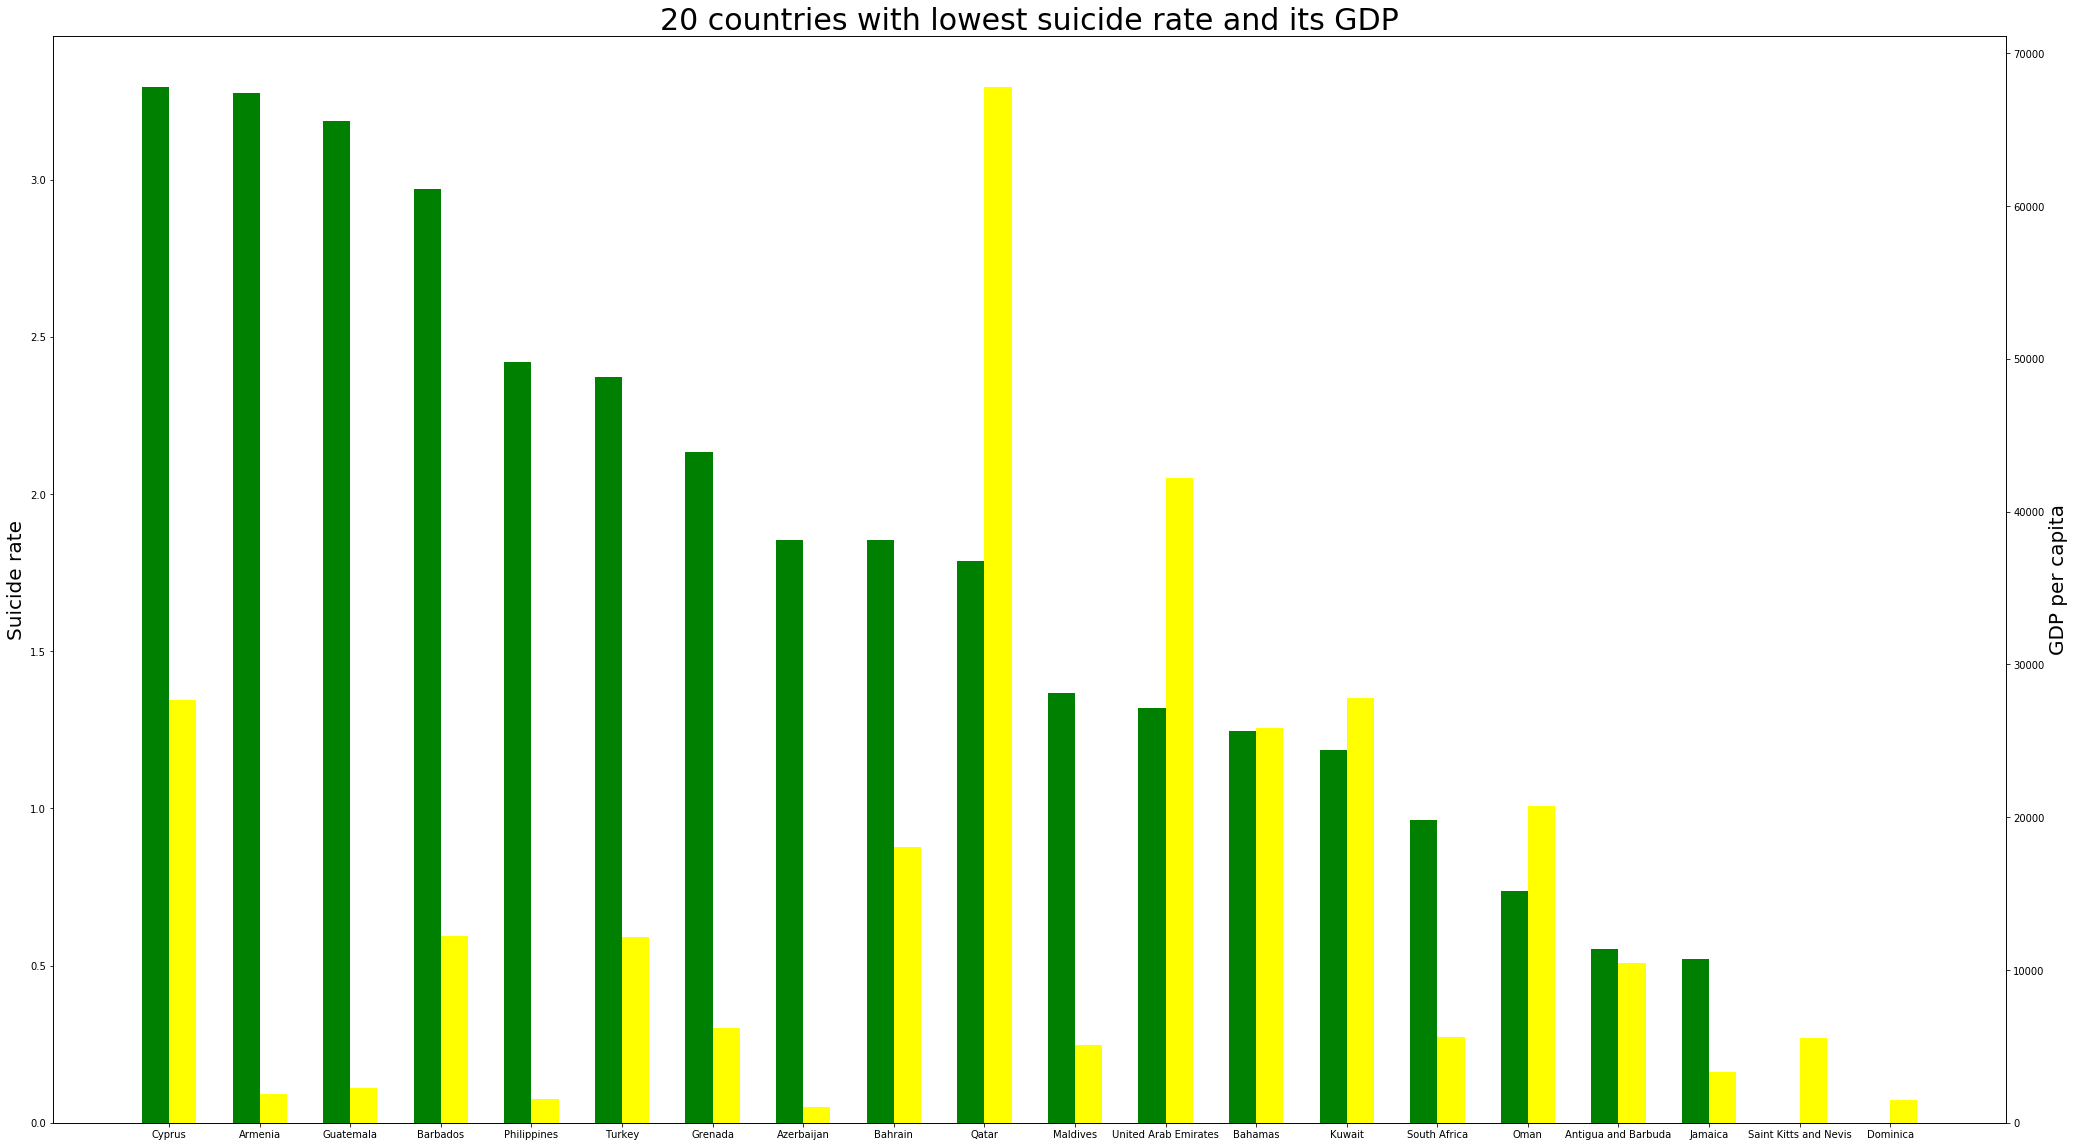

In [24]:
lowest_countries = np.array(lowest_suicide_rate.iloc[:,0])
lowest_suicide_rate_value = np.array(lowest_suicide_rate.iloc[:,1])
lowest_suicide_gdp = np.array(lowest_suicide_rate.iloc[:,2])

fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.xticks(range(20),lowest_countries,rotation=90,fontsize=10)
plt.title('20 countries with lowest suicide rate and its GDP',fontsize=30)
#plt.xlabel('Countries')
ax1.set_ylabel('Suicide rate',fontsize=20)
ax2.set_ylabel('GDP per capita',fontsize=20)

width = 0.3
position1 = np.arange(topN) - width/2.0
position2 = position1 + width
bar1 = ax1.bar(position1,lowest_suicide_rate_value,width=width,color='green')
bar2 = ax2.bar(position2,lowest_suicide_gdp,width=width,color='yellow')



#### The green bars below illustrate the average suicide_rates, and the yellow bars illustrate the GDP per capita.  We find out that the yellow bar(GDP) of Qatar is very high, so we try to have a futher understanding of the data of Qatar.

In [25]:
Qatar_data = data.iloc[np.where(data['country']=='Qatar')[0],:]
Qatar_data = Qatar_data.reset_index(drop=True)

#### Let's have a quick look at the data of Qatar, showed as below. (NaN means the data are missed)

In [26]:
Qatar_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Qatar,1995,female,15-24 years,0,24859,0.00,Qatar1995,0.783,"8,137,911,978",17559,Generation X
1,Qatar,1995,female,25-34 years,0,36029,0.00,Qatar1995,0.783,"8,137,911,978",17559,Generation X
2,Qatar,1995,female,35-54 years,0,39135,0.00,Qatar1995,0.783,"8,137,911,978",17559,Boomers
3,Qatar,1995,female,5-14 years,0,43647,0.00,Qatar1995,0.783,"8,137,911,978",17559,Millenials
4,Qatar,1995,female,55-74 years,0,5879,0.00,Qatar1995,0.783,"8,137,911,978",17559,Silent
5,Qatar,1995,female,75+ years,0,1070,0.00,Qatar1995,0.783,"8,137,911,978",17559,G.I. Generation
6,Qatar,1995,male,15-24 years,0,45900,0.00,Qatar1995,0.783,"8,137,911,978",17559,Generation X
7,Qatar,1995,male,25-34 years,0,88331,0.00,Qatar1995,0.783,"8,137,911,978",17559,Generation X
8,Qatar,1995,male,35-54 years,0,116596,0.00,Qatar1995,0.783,"8,137,911,978",17559,Boomers
9,Qatar,1995,male,5-14 years,0,46510,0.00,Qatar1995,0.783,"8,137,911,978",17559,Millenials


#### Check the suicide_rate of Qatar by year

In [27]:
Qatar_data_by_year = Qatar_data.groupby('year').mean()
Qatar_data_by_year

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1995,0.000000,38620.750000,0.000000,0.783,17559.0
2001,1.916667,44956.916667,2.275000,NaN,32510.0
2004,1.750000,58099.250000,1.270833,NaN,45517.0
2005,1.416667,66384.833333,1.566667,0.837,55899.0
2006,2.416667,78340.833333,7.275000,NaN,64762.0
2007,3.416667,92956.583333,2.384167,NaN,71460.0
2008,2.750000,109205.416667,1.129167,NaN,87961.0
2009,3.666667,125554.083333,1.658333,NaN,64911.0
2010,3.916667,140799.333333,1.069167,0.844,74055.0


### Let's plot the line chart, show relationship between gdp and suicide_rate

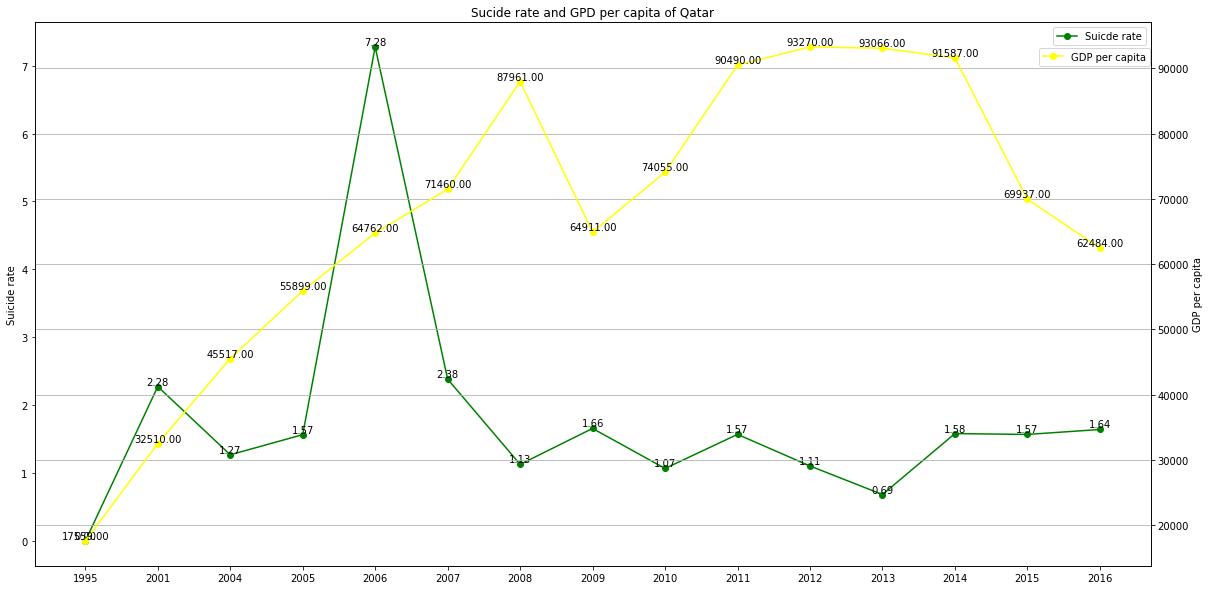

In [28]:
years_Qatar = np.unique(Qatar_data['year'])
Qatar_suicide_rate = np.array(Qatar_data_by_year.iloc[:,2])
Qatar_gdp = np.array(Qatar_data_by_year.iloc[:,4])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Qatar')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(years_Qatar)),Qatar_suicide_rate,color='green',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(years_Qatar)),Qatar_gdp,color ='yellow',label='GDP per capita', marker ='o');
plt.xticks(range(len(years_Qatar)), years_Qatar, rotation=90)

ax1.legend()
ax2.legend(loc = (0.9,0.92))


for i in range(len(years_Qatar)):
    ax1.text(i,Qatar_suicide_rate[i],'%.2f' % Qatar_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(years_Qatar)):
    ax2.text(i,Qatar_gdp[i],'%.2f' % Qatar_gdp[i], ha='center', va= 'bottom')

plt.grid()

### There is an obvious increase of suicide_rate in Qatar from 2005(1.57%) to 2006(7.28%), though the  GDP per captia was still increasing at that time. So may be something happend in Qatar at that time?

## Let's check each country, and try to figure out if there are some crazy increase of suicide_rate. 

In [29]:
max_increase= 0
max_increase_country_year = np.array([])
second_increase = 0
second_increase_country_year = np.array([])
third_increase = 0
third_increase_country_year = np.array([])



all_countries = np.unique(np.array(data.loc[:,'country']))

for current_country in all_countries:
    current_data = data.iloc[np.where(data['country']==current_country)[0]]
    current_data_by_year = current_data.groupby('year').mean()
    #columns index 2 is the 'suicide_rate'
    
    current_max = 0;
    current_second = 0;
    current_third = 0;
    
    current_max_country_year = np.array([])
    current_second_country_year = np.array([])
    current_third_country_year = np.array([])
    
    rows = current_data_by_year.shape[0];
    columns = current_data_by_year.shape[1];
    
    for i in range(rows-1):
        temp_increase = current_data_by_year.iloc[i+1,2] - current_data_by_year.iloc[i,2]
        if (temp_increase > current_max):
            current_third = current_second
            current_third_country_year = current_second_country_year
            
            current_second = current_max
            current_second_country_year = current_max_country_year
            
            current_max = temp_increase
            current_max_country_year = np.array([current_country,current_data_by_year.index[i],current_data_by_year.index[i+1]])
            continue;
        elif(temp_increase > current_second):
            current_third = current_second
            current_third_country_year = current_second_country_year
            
            current_second = temp_increase
            current_second_country_year = np.array([current_country,current_data_by_year.index[i],current_data_by_year.index[i+1]])
            continue;
        elif(temp_increase > current_third):
            current_third = temp_increase
            current_third_country_year = np.array([current_country,current_data_by_year.index[i],current_data_by_year.index[i+1]])
            continue;
        else:
            continue;
        
    #end of the loop, current_max,second,and third have been saved.
    #compare and save
    if(current_max>max_increase):
        third_increase = second_increase
        third_increase_country_year = second_increase_country_year
        
        second_increase = max_increase
        second_increase_country_year = max_increase_country_year
        
        max_increase = current_max
        max_increase_country_year = current_max_country_year
        
        continue;
    elif(current_max>second_increase):
        third_increase = second_increase
        third_increase_country_year = second_increase_country_year
        
        second_increase = current_max
        second_increase_country_year = current_max_country_year
        continue;
    elif(current_max>third_increase):
        third_increase = current_max
        third_increase_country_year = current_max_country_year
        continue;
    
    

## let's check in which country, at which time it has the highest suicide rate

In [30]:
print('Highest increase: ',max_increase, '\n Country: %s' % max_increase_country_year[0],
      ', time: ', max_increase_country_year[1],'to',max_increase_country_year[2])
print('\n')
print('Second Highest increase: ',second_increase, '\n Country: %s' % second_increase_country_year[0],
      ', time: ', second_increase_country_year[1],'to',second_increase_country_year[2])
print('\n')
print('Third Highest increase: ',third_increase, '\n Country: %s' % third_increase_country_year[0],
      ', time: ', third_increase_country_year[1],'to',third_increase_country_year[2])


Highest increase:  27.96083333333333 
 Country: Montenegro , time:  2006 to 2007


Second Highest increase:  20.73 
 Country: Guyana , time:  1998 to 1999


Third Highest increase:  17.020833333333336 
 Country: Seychelles , time:  2005 to 2006


## we find that country Montenegro have 27% increase of suicide rate from 2006 to 2007, plot the relationship of GDP and Suicide_rate of Montenegro

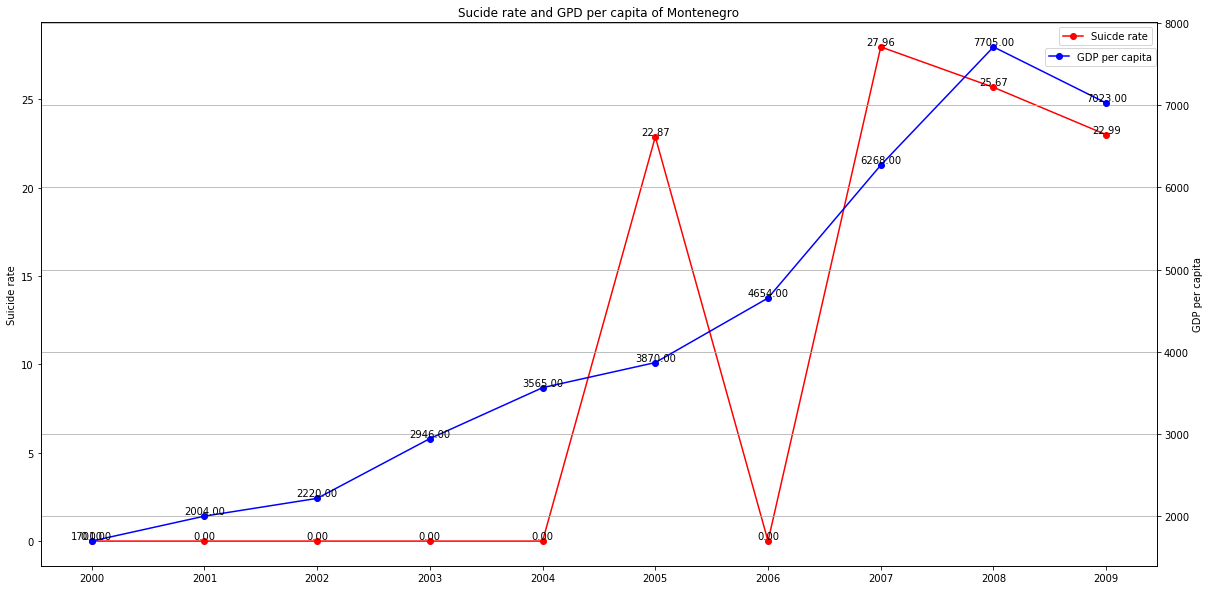

In [31]:
SA_data = data.iloc[np.where(data['country'] == 'Montenegro')[0]]

SA_times = SA_data['year'].unique()
SA_data = SA_data.groupby('year').mean()
SA_suicide_rate = np.array(SA_data.loc[:,'suicides/100k pop'])
SA_gdp = np.array(SA_data.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Montenegro')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(SA_times)),SA_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(SA_times)),SA_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(SA_times)), SA_times, rotation=90)

ax1.legend()
ax2.legend(loc = (0.9,0.92))
for i in range(len(SA_times)):
    ax1.text(i,SA_suicide_rate[i],'%.2f' % SA_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(SA_times)):
    ax2.text(i,SA_gdp[i],'%.2f' % SA_gdp[i], ha='center', va= 'bottom')

plt.grid()

### Notice that the trend is really very abnormal and hard to understand, so from techniqcal aspect, I guess the suicide rate in 2006 should not be zero, this point might be an 'outlier'. However, the value datapoint could be right if there are some other factors because suicide_rate not only rely on GDP. We can have a further discussion.

### Let's check the Country 'Guyana' and 'Seychelles' because they also have a rapid increase (1998-1999) and (2005-2006) respectively.

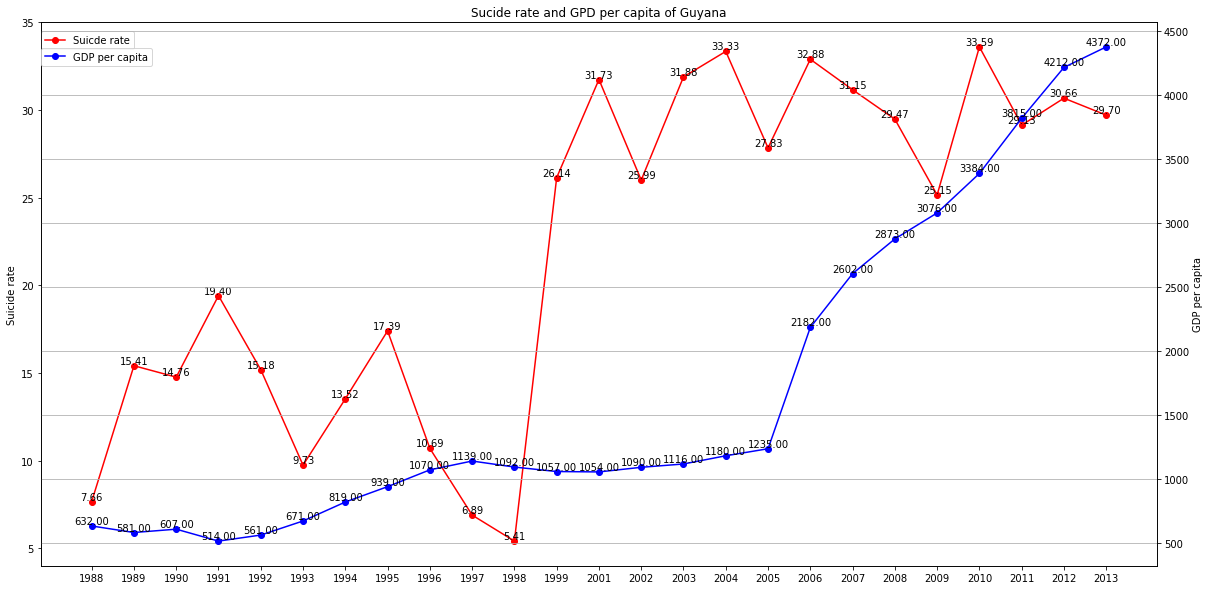

In [55]:
SA_data = data.iloc[np.where(data['country'] == 'Guyana')[0]]

SA_times = SA_data['year'].unique()
SA_data = SA_data.groupby('year').mean()
SA_suicide_rate = np.array(SA_data.loc[:,'suicides/100k pop'])
SA_gdp = np.array(SA_data.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Guyana')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(SA_times)),SA_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(SA_times)),SA_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(SA_times)), SA_times, rotation=90)

ax1.legend(loc = (0,0.95))
ax2.legend(loc = (0,0.92))
for i in range(len(SA_times)):
    ax1.text(i,SA_suicide_rate[i],'%.2f' % SA_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(SA_times)):
    ax2.text(i,SA_gdp[i],'%.2f' % SA_gdp[i], ha='center', va= 'bottom')

plt.grid()

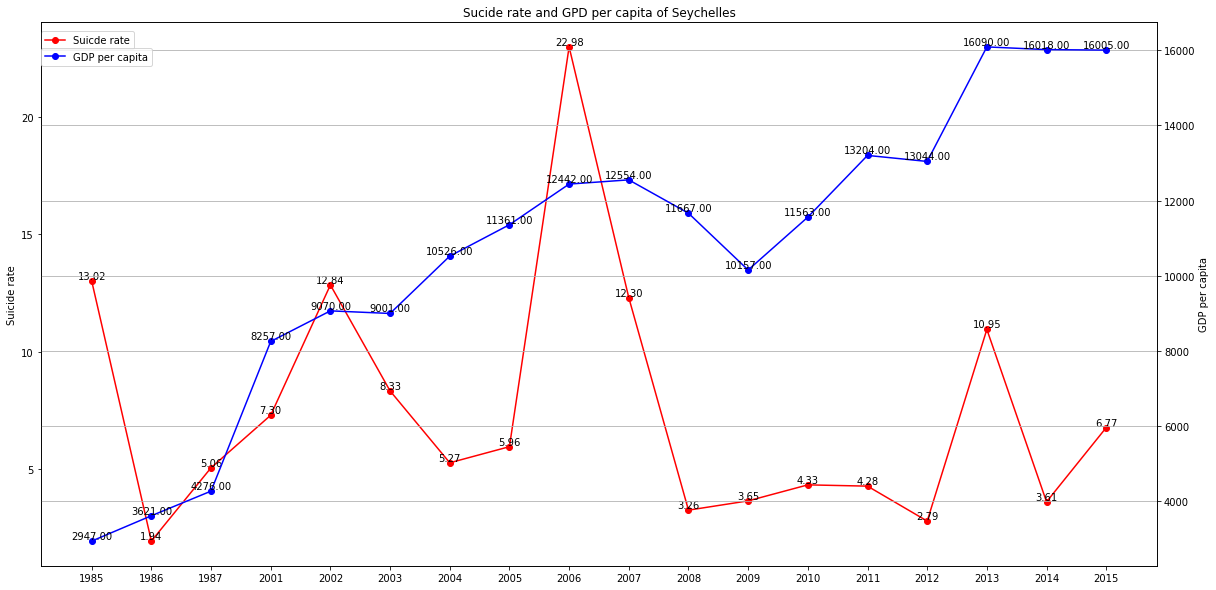

In [56]:
SA_data = data.iloc[np.where(data['country'] == 'Seychelles')[0]]

SA_times = SA_data['year'].unique()
SA_data = SA_data.groupby('year').mean()
SA_suicide_rate = np.array(SA_data.loc[:,'suicides/100k pop'])
SA_gdp = np.array(SA_data.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
plt.title('Sucide rate and GPD per capita of Seychelles')

plt.xlabel('Years')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')
ax1.plot(range(len(SA_times)),SA_suicide_rate,color='r',label ='Suicde rate', marker = 'o');
ax2.plot(range(len(SA_times)),SA_gdp,color ='b',label='GDP per capita', marker ='o');
plt.xticks(range(len(SA_times)), SA_times, rotation=90)

ax1.legend(loc = (0,0.95))
ax2.legend(loc = (0,0.92))
for i in range(len(SA_times)):
    ax1.text(i,SA_suicide_rate[i],'%.2f' % SA_suicide_rate[i], ha='center', va='bottom')
    
for i in range(len(SA_times)):
    ax2.text(i,SA_gdp[i],'%.2f' % SA_gdp[i], ha='center', va= 'bottom')

plt.grid()

# Section3:
## In this section, we would like to compare the suicide rate of low-income countries, medium-income countries and high income countries.

In [34]:
#suicide_rate.sort_values(by='country')
all_middle_countries = ['Afghanistan',
'Albania',
'Algeria',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Azerbaijan',
'Bangladesh',
'Belarus',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Burkina Faso',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Central African Republic',
'Chad',
'China',
'Colombia',
'Comoros',
'Democratic Republic of Congo',
'Congo',
'Cook Islands',
'Costa Rica',
"Côte d'Ivoire",
'Cuba',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Fiji',
'Gabon',
'Gambia',
'Georgia',
'Ghana',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Honduras',
'India',
'Indonesia',
'Iran',
'Iraq',
'Jamaica',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
'Korea',
'Kosovo',
'Kyrgyzstan',
'Lao',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Former Yugoslav Republic of Macedonia',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mexico',
'Micronesia',
'Moldova',
'Mongolia',
'Montenegro',
'Montserrat',
'Morocco',
'Mozambique',
'Myanmar',
'Namibia',
'Nauru',
'Nepal',
'Nicaragua',
'Niger',
'Nigeria',
'Niue',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Rwanda',
'Saint Helena',
'Samoa',
'Senegal',
'Serbia',
'Sierra Leone',
'Solomon Islands',
'Somalia',
'South Africa',
'South Sudan',
'Sri Lanka',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Sudan',
'Suriname',
'Swaziland',
'Syrian Arab Republic',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Tokelau',
'Tonga',
'Tunisia',
'Turkey',
'Turkmenistan',
'Tuvalu',
'Uganda',
'Ukraine',
'Uzbekistan',
'Vanuatu',
'Venezuela',
'Vietnam',
'Wallis and Futuna',
'West Bank and Gaza Strip',
'Yemen',
'Zambia',
'Zimbabwe']

In [35]:
common_low_countries = []
common_high_countries = []
for current_country in all_countries:
    if (current_country in all_middle_countries):
        common_low_countries.append(current_country)
    else:
        common_high_countries.append(current_country)

## Show all low-income/middle-income countries

In [36]:
suicide_rate = suicide_rate.reset_index(drop=True)
low_index = []
high_index = []

for current_country in common_low_countries:
    low_index.append(np.where(suicide_rate['country'] == current_country)[0][0])

for current_country in common_high_countries:
    high_index.append(np.where(suicide_rate['country'] == current_country)[0][0])

low_index = np.array(low_index).reshape(-1,1)
high_index = np.array(high_index).reshape(-1,1)
suicide_rate_low = suicide_rate.iloc[low_index[:,0]].reset_index(drop=True)
suicide_rate_low

,country,suicides/100k pop,gdp_per_capita ($)
0,Albania,3.502879,1859.045455
1,Antigua and Barbuda,0.552901,10448.185185
2,Argentina,10.469328,7914.096774
3,Armenia,3.275872,1873.919463
4,Azerbaijan,1.855417,1005.125000
5,Belarus,31.075913,3333.904762
6,Belize,6.230625,4006.464286
7,Bosnia and Herzegovina,4.617083,5077.500000
8,Brazil,5.846022,6091.483871
9,Cabo Verde,11.153333,4124.000000


## show all high-income countries and their suicide rate

In [37]:
suicide_rate_high = suicide_rate.iloc[high_index[:,0]].reset_index(drop=True)
suicide_rate_high

,country,suicides/100k pop,gdp_per_capita ($)
0,Aruba,9.503095,24221.642857
1,Australia,12.992806,32776.400000
2,Austria,23.759764,34261.780105
3,Bahamas,1.247391,25836.391304
4,Bahrain,1.854127,18039.523810
5,Barbados,2.970433,12251.000000
6,Belgium,21.237903,32066.741935
7,Bulgaria,19.489111,3640.433333
8,Canada,12.467586,30887.482759
9,Chile,10.542043,7493.064516


# what about the mean of suicide rate of low-income/medium-income countries and the mean of suicide rate of high-income/countries?

### First show mean of low/medium income countries

In [38]:
suicide_rate_low.mean()

suicides/100k pop        9.609093
gdp_per_capita ($)    3939.931924
dtype: float64

### Next show mean of high income countries

In [39]:
suicide_rate_high.mean()

suicides/100k pop        13.892040
gdp_per_capita ($)    25182.299328
dtype: float64

## The median of low/medium income countries

In [41]:
suicide_rate_low.median()

suicides/100k pop        6.435636
gdp_per_capita ($)    3811.120235
dtype: float64

## The median of high-income countries

In [45]:
suicide_rate_high.median()

suicides/100k pop        12.941000
gdp_per_capita ($)    22279.482759
dtype: float64